In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
iris=pd.read_csv('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv')
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_len    150 non-null float64
sepal_wid    150 non-null float64
petal_len    150 non-null float64
petal_wid    150 non-null float64
class        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


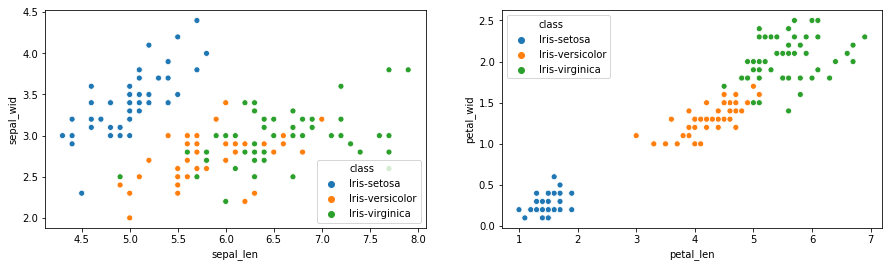

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15,4))

sns.scatterplot(x=iris['sepal_len'],y=iris['sepal_wid'],hue=iris['class'], ax=axs[0])
sns.scatterplot(x=iris['petal_len'],y=iris['petal_wid'],hue=iris['class'], ax=axs[1])

In [13]:
iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


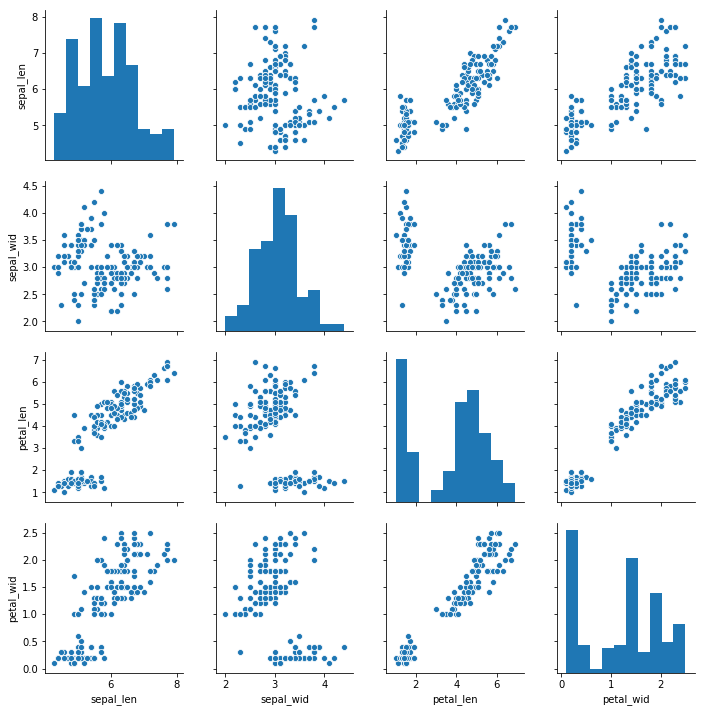

In [14]:
sns.pairplot(iris)

[]

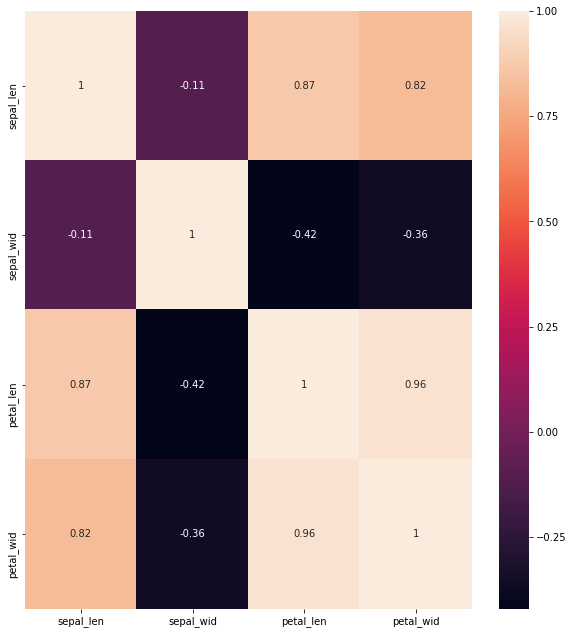

In [18]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(), annot=True)
plt.plot()

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.109369,0.871754,0.817954
sepal_wid,-0.109369,1.000000,-0.420516,-0.356544
petal_len,0.871754,-0.420516,1.000000,0.962757
petal_wid,0.817954,-0.356544,0.962757,1.000000


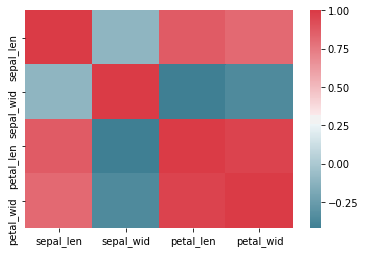

In [19]:
# Calculate the Pearson Correlation Coefficient between all features

corr_df = iris.corr(method="pearson") 
display(corr_df)

sns.heatmap(corr_df, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)

# Using Linear Regression to find Coefficient of Determination

In [20]:
[col for col in iris.columns]

['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [47]:
# x=iris['petal_len'] Why doesnt this code work instead?
# y=iris['petal_wid']

feature=['petal_len']
label=['petal_wid']

x=iris[feature]
y=iris[label]

In [48]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# this is one way of splitting up the data (both features and target) into a training set and a testing set.
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [50]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
linreg.score(x_test,y_test)

0.8981342580191188

In [52]:
# Make predictions using the testing set
iris_y_pred = linreg.predict(x_test)

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, iris_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, iris_y_pred))

Coefficients: 
 [[0.41744651]]
Mean squared error: 0.06
Coefficient of determination: 0.90
